# Introduction 

Imagine you are a member of an analytics team that provides insights for an association of zoos and aquariums. You have been assigned to a project focusing on Adelie and Chinstrap penguins, as these particular species have been in [decline](https://www.scientificamerican.com/article/gentoo-penguins-thrive-while-adelies-and-chinstraps-falter-in-a-climate-changed-world/). 

In this activity, you will conduct simple linear regression on a relevant dataset.

# Imports and Data Loading

### In this section, let's first import relevant Python libraries and modules.
This includes `pandas`, `pyplot`, `seaborn`, `ols`, and `statsmodels` api.

In [2]:
# !pip install statsmodels

In [3]:
# Import libraries and modules

## YOUR CODE HERE ###
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.api as sm



### Now let's load the penguins dataset into a DataFrame.
Let's work with the penguins dataset provided by the seaborn library.

In [4]:
# Load data

## YOUR CODE HERE ###
sales_data = pd.read_csv("marketing_sales_data.csv")

# Data Exploration and Cleaning

### Let's take a look at the data.

In [5]:
sales_data.head()

,TV,Radio,Social Media,Influencer,Sales
0,Low,3.518070,2.293790,Micro,55.261284
1,Low,7.756876,2.572287,Mega,67.574904
2,High,20.348988,1.227180,Micro,272.250108
3,Medium,20.108487,2.728374,Mega,195.102176
4,High,31.653200,7.776978,Nano,273.960377


In [6]:
# Take a look at the data 

## YOUR CODE HERE ###

#Rows
sales_data.shape[0]
#Columns
sales_data.shape[1]

5

In [7]:
# Axis = 0 : Column
# Axis = 1 : Row
sales_data.isnull().any(axis=1).sum()

0

In [8]:
sales_data.dropna(axis=1)

,TV,Radio,Social Media,Influencer,Sales
0,Low,3.518070,2.293790,Micro,55.261284
1,Low,7.756876,2.572287,Mega,67.574904
2,High,20.348988,1.227180,Micro,272.250108
3,Medium,20.108487,2.728374,Mega,195.102176
4,High,31.653200,7.776978,Nano,273.960377
...,...,...,...,...,...
567,Medium,14.656633,3.817980,Micro,191.521266
568,High,28.110171,7.358169,Mega,297.626731
569,Medium,11.401084,5.818697,Nano,145.416851
570,Medium,21.119991,5.703028,Macro,209.326830


In [9]:
sales_data.isna()

,TV,Radio,Social Media,Influencer,Sales
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
567,False,False,False,False,False
568,False,False,False,False,False
569,False,False,False,False,False
570,False,False,False,False,False


### Question 1:
What do you observe about the different aspects of penguins shown in the data?


### Let's identify the number of rows and the number of columns in the data.

In [10]:
# Identify the number of rows and the number of columns in the data

## YOUR CODE HERE ###


### Question 2:
What do you observe about the number of rows and the number of columns in the data?


### Let's check for missing values in the rows of the data.

In [11]:
# How many rows with missing values

## YOUR CODE HERE ###


### Question 3:


### Let's drop the rows with missing values. 
This an important step in data cleaning, as it makes the data more usable for the next steps of analysis and regression. 

In [12]:
# Drop the rows with missing values
# Update data

## YOUR CODE HERE ###



# Check to make sure that the data does not contain any missing values now

## YOUR CODE HERE ###



### Let's filter the data to only include Adelie and Chinstrap penguin species.
This is another important step in data cleaning, as those species are the focus of your project.

In [13]:
# Filter data so that it only contains rows where the species is either Adelie or Chinstrap
# Update data with result

## YOUR CODE HERE ###


# Take a look at the data now

## YOUR CODE HERE ###



# Exploratory Data Analysis and Regression
Let's say you want to explore the relationship between penguins' **flipper length** and **body mass**, as that could help you gain insight on penguins' needs. You could model the relationship using linear regression. To do this, you want to check if the model assumptions for linear regression can be made in this context. Some of the assumptions can be addressed before the model is built --- you will address those in this section. After the model is built, you can finish checking the assumptions.

### Linearity

Let's check if the assumption of linearity is met. 

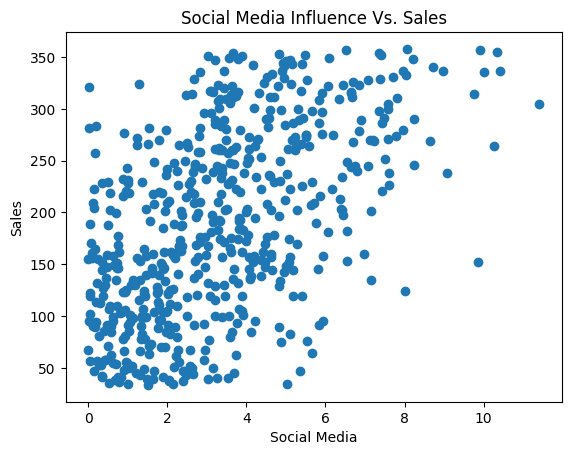

In [27]:
# Check if linearity assumption is met

### YOUR CODE HERE
plt.scatter(sales_data["Social Media"],sales_data["Sales"])
plt.title("Social Media Influence Vs. Sales")
plt.xlabel("Social Media")
plt.ylabel("Sales")
plt.show()



##### Hint 1:

A scatter plot can be used to check if the linearity assumption is met.

##### Hint 2:

You can use the `scatter` function from the matplotlib.pyplot library or the `scatterplot` function from the seaborn library to create a scatter plot. 

### Question 4:
What do you observe from the scatter plot?


### Normality
Let's check if both flipper length and body mass are normally distributed (or close to being normally distributed). If they are, then it is likely that the residuals are also normally distributed, which you can check after you build the model.

(array([108., 103., 106.,  99.,  73.,  36.,  29.,  10.,   5.,   3.]),
 array([3.13000000e-05, 1.14039067e+00, 2.28075005e+00, 3.42110942e+00,
        4.56146880e+00, 5.70182817e+00, 6.84218754e+00, 7.98254692e+00,
        9.12290629e+00, 1.02632657e+01, 1.14036250e+01]),
 <BarContainer object of 10 artists>)

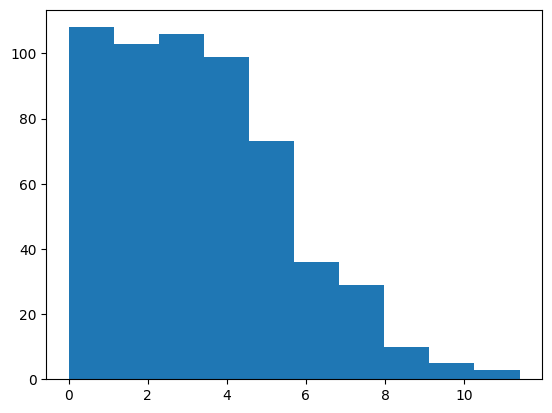

In [29]:
# Check if flipper length is normally distributed

### YOUR CODE HERE
plt.hist(sales_data["Social Media"])


In [16]:
# Check if body mass is normally distributed

### YOUR CODE HERE



##### Hint 1:

A histogram can be used to visualize the distribution of a variable.

##### Hint 2:

You can use the `hist` function from the matplotlib.pyplot library or the `histplot` function from the seaborn library to create a scatter plot. 

### Question 5: 
What do you observe about the distribution of flipper length and the distribution of body mass?


### Independence
Let's check if the assumption of independent observations is met by considering the context of what each entry in the data represents and how the data would have been collected.

### Question 6: 
Based on the context behind the data, do you think the independent observations assumption is met?


# Build Model

### Let's start by selecting only the columns that are needed for the model that you will build from the data. 

In [17]:
# Select relevant columns
# Save resulting dataframe in a separate variable to prepare for regression

### YOUR CODE HERE


# Take a look at the subset to make sure it looks right

### YOUR CODE HERE



##### Hint 1:

Make sure to get the columns that correspond to flipper length and body mass.

##### Hint 2:

You can use a pair of double square brackets to select a subset of a dataframe.

### Let's write the linear regression formula for modeling the relationship between body mass and flipper length.

In [18]:
# Write the linear regression formula
# Save it in a variable

### YOUR CODE HERE


# Take a look at the formula to make sure it looks right

### YOUR CODE HERE



##### Hint 1:

Save the formula as string.

##### Hint 2:

Use a tilde to separate the y variable from the x variable so that the computer understands which is which. Make sure the spelling of each variable exactly matches the corresponding column from the data.

### Let's implement the Ordinary Least Squares (OLS) approach for linear regression. 

In [19]:
# Implement OLS

### YOUR CODE HERE



##### Hint 1:

There is a function from the statsmodels library that can be used to implement OLS.

##### Hint 2:

You can use the `ols` function from the statsmodels library.

### Let's create a linear regression model for the data, fit the model to the data.

In [20]:
# Fit the model to the data
# Save the fitted model in a variable

### YOUR CODE HERE



##### Hint 1:

There is a function from the statsmodels library that can be used to fit the model.

##### Hint 2:

You can use the `fit` function from the statsmodels library

### Let's get a summary of the results from the model.

In [21]:
# Get summary of results 

### YOUR CODE HERE



##### Hint 1:

There is a function from the statsmodels library that can be used to get the summary of results from a model.

##### Hint 2:

You can use the `summary` function from the statsmodels library here.

### Let's take a look at the bottom table from the results summary. 
Based on that table, let's identify the coefficients that the model determined would generate the line of best fit, the coefficients here being the y-intercept and the slope. 

### Question 7: 
What is the y-intercept?


### Question 8:
What is the slope?


### Question 9:
What is the linear equation you would write to express the relationship between body mass and flipper length in the form of y = slope * x + y-intercept.


### Question 10:
What do you think the slope in this context means?


# Finish checking model assumptions 

### Normality Continued

#### Check if the residuals are normally distributed.

In [22]:
# Get the residuals from the model

### YOUR CODE HERE



# Check if the residuals are normally distributed

### YOUR CODE HERE



##### Hint 1:

There is a function in the statsmodels library that can be used to get residuals. You can create a histogram to visualize the distribution of a variable. 

##### Hint 2:

You can use the `resid` function from the statsmodels library to get the residuals. You can use the `hist` function from the matplotlib.pyplot module or the `histplot` function from the seaborn library to create a histogram.

### Question 11:
Based on the histogram above, what do you observe about the distribution of the residuals?


#### Confirm normality with a Q-Q plot.

In [23]:
# Create a Q-Q plot to confirm normality assumption 

### YOUR CODE HERE



##### Hint 1:

There is a function in the statsmodels library that can be used to create a Q-Q plot. You can create a Q-Q plot of the residuals to confirm if the normality assumption is met. 

##### Hint 2:

You can use the `qqplot` function from the statsmodels library to achieve this. 

### Question 12:
What do you observe about the Q-Q plot above?


### Homoscedasticity
Check if the assumption of homoskedasticity is met.

In [24]:
# Get the X values

### YOUR CODE HERE



# Get the fitted values

### YOUR CODE HERE


# Create a scatter plot

### YOUR CODE HERE



##### Hint 1:

There is a function in the statsmodels library that can be used to get fitted values. You can create a scatter plot to check for homoskedasticity.

##### Hint 2:

You can use the `predict` function from the statsmodels library to get the fitted values. You can create a scatter plot of the fitted values over the residuals to check for homoskedasticity.

### Question 13:
What do you observe from the scatter plot above?


# Conclusion

**What are your key takeaways from this activity?**


**How would you summarize the results?**


**What story would your present to stakeholders?**

